# OPIM 3511 HW4 - Spring 2022
# DUE: 3/21/2022 11:59PM

14th is spring break so lets set the deadline after the spring break :)

Download your HW as a .ipynb file, then submit it to HuskyCT.

When sharing the link, please make sure you change your setting to "anyone with link can view".

In [1]:
#import all your libraries
import pandas as pd
import numpy as np
from pylab import *
import seaborn as sb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## QUESTION A (Logistic Regression)

In this assignment, you will practice working on a real-world classification problem - predicting whether or not someone has malignant cancer based on a tumor's attributes.

I will help you with some of the initial processing, and then you will fit and evaluate your model. Enjoy and good luck!


In [4]:
# https://drive.google.com/file/d/1_aOwBsRfOpkSPp_5Zyi3829d-qZTCqwB/view?usp=sharing

# we can actually load this without mounting our google drive!
!gdown --id 1_aOwBsRfOpkSPp_5Zyi3829d-qZTCqwB #see the id of file?

# click the folder, this has downloaded the file to your local runtime!
# no need to mount your drive :)

Downloading...
From: https://drive.google.com/uc?id=1_aOwBsRfOpkSPp_5Zyi3829d-qZTCqwB
To: /content/breastcancer.csv
100% 125k/125k [00:00<00:00, 71.0MB/s]


In [5]:
# now we can directly import it
df_questionA = pd.read_csv('breastcancer.csv')
df_questionA.shape

(569, 33)

The target variable will be `diagnosis`. Let's drop that last unnamed column while we are here. And since `id` doesn't have predictive power, let's drop that too.

In [6]:
# notice how we are dropping these columns INPLACE
df_questionA.drop('Unnamed: 32', axis=1, inplace=True)
df_questionA.drop('id', axis=1, inplace=True)

# check your work
df_questionA.shape

(569, 31)

If you look at the unique values in the `diagnosis` column, we see that these are... **M** for malignant and **B** for benign.

In [7]:
from collections import Counter
Counter(df_questionA['diagnosis'])

Counter({'B': 357, 'M': 212})

In [8]:
# convert to binary variable - 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_questionA['diagnosis'] = LE.fit_transform(df_questionA['diagnosis'])
Counter(df_questionA['diagnosis'])

Counter({0: 357, 1: 212})

In [9]:
# now this df_questionA is ready for the next steps :D
df_questionA.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
print("This is the shape :\n", df_questionA.shape, '\n') # escape characters are fun! \n adds a return line
print("These are the column names: \n", df_questionA.columns, '\n') # helps keep things nice and clean
print("These are the data types: \n", df_questionA.dtypes)

This is the shape :
 (569, 31) 

These are the column names: 
 Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object') 

These are the data types: 
 diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean    

### Now it is your turn:

(1) perform some necessary EDA to see if we need to drop any missing values, also maybe some visualition to check the distribution

(2) split test and train, build a logistic regression model (also dont forget min/max scaling)

(3) evaluate your model on testing data

**There is no "correct" answer for coding. When I check your HW, I care more about your logic/your flow of coding.**

For example, "I am dropping this row because there is missing data; I am dropping this column because it is not useful for the purpose of my model based on domain knowledge; I am using confusion matrix to evaluate the model because this is classification instead of regression..."

**Please include some comments to make your code easier to read.**

In [11]:
df_questionA.isnull().sum().sum() #no null values

0

In [12]:
df_questionA.dropna(axis = 0, inplace = True)
#drop NaN values

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.linear_model import LogisticRegression


In [ ]:
sb.pairplot(df_questionA)

In [15]:
# CHANGE THE RESPONSE TO BINARY VARIABLE
df_questionA['diagnosis'] = np.where(df_questionA['diagnosis'] > df_questionA['diagnosis'].median(),
                      1, # if true
                      0) # if false

In [16]:
df_questionA['diagnosis'].head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

In [18]:
Y = df_questionA['diagnosis']

In [20]:
X = df_questionA.drop('diagnosis', axis = 1)
print(X.shape)

(569, 30)


In [21]:
X.head(
)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
X_mtrain, X_mtest, y_train, y_test = train_test_split(X,Y, test_size = 0.2, shuffle = True, random_state = 2032019)
#split test and train data

In [23]:
print(X_mtrain.shape, X_mtest.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [24]:
X_train = np.array(X_mtrain)
X_test = np.array(X_mtest)
y_train = np.array(y_train)
y_test = np.array(y_test)
#convert test and train data to numpy array

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#bring x values all to same scale

In [26]:
tmp = pd.DataFrame(X_train)
tmp.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.340508,0.393529,0.335208,0.218696,0.391445,0.261958,0.209234,0.244345,0.377268,0.271071,...,0.299962,0.361261,0.286289,0.173411,0.400680,0.221590,0.233136,0.396202,0.262546,0.190666
std,0.166327,0.175916,0.167566,0.148498,0.129996,0.167886,0.188999,0.193037,0.142526,0.153777,...,0.172557,0.163766,0.168280,0.140945,0.154165,0.155796,0.175907,0.226308,0.127483,0.121924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.225472,0.267427,0.218955,0.120106,0.295342,0.141019,0.067619,0.100944,0.278535,0.162384,...,0.183387,0.235874,0.169630,0.082629,0.289771,0.115755,0.100385,0.221667,0.180564,0.105011
50%,0.305694,0.380913,0.299703,0.175483,0.381782,0.219588,0.140933,0.173111,0.363131,0.242839,...,0.253291,0.356610,0.241197,0.126204,0.392459,0.183475,0.196752,0.347079,0.240883,0.164109
75%,0.429221,0.493361,0.422293,0.278218,0.471879,0.340991,0.304592,0.366899,0.451010,0.340354,...,0.389719,0.462420,0.374969,0.223112,0.494156,0.305576,0.326410,0.558419,0.317465,0.243506
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       455 non-null    float64
 1   1       455 non-null    float64
 2   2       455 non-null    float64
 3   3       455 non-null    float64
 4   4       455 non-null    float64
 5   5       455 non-null    float64
 6   6       455 non-null    float64
 7   7       455 non-null    float64
 8   8       455 non-null    float64
 9   9       455 non-null    float64
 10  10      455 non-null    float64
 11  11      455 non-null    float64
 12  12      455 non-null    float64
 13  13      455 non-null    float64
 14  14      455 non-null    float64
 15  15      455 non-null    float64
 16  16      455 non-null    float64
 17  17      455 non-null    float64
 18  18      455 non-null    float64
 19  19      455 non-null    float64
 20  20      455 non-null    float64
 21  21      455 non-null    float64
 22  22

In [35]:
LR = LogisticRegression()

In [36]:
LR = LR.fit(X_train, y_train)
#fit data into logistic regression model 

In [37]:
np.where(df_questionA.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [38]:
train_preds = LR.predict(X_train)
test_preds = LR.predict(X_test)
np.shape(train_preds)

(455,)

In [39]:
tn, fp, fn, tp = confusion_matrix(y_train, train_preds).ravel()
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

TP: 166
TN: 280
FP: 1
FN: 8


In [40]:
trainResults = classification_report(y_train, train_preds) # (actual, predicted)
print(trainResults)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       281
           1       0.99      0.95      0.97       174

    accuracy                           0.98       455
   macro avg       0.98      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [ ]:
#the model was very accurate, and got only one false positive and 8 false negative in the confusion matrix


## QUESTION B (Ridge or Lasso)

Remember the mpg data we worked with last week for MLP?

In [62]:
# our old friend mpg data :)
df_questionB = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv')

In [63]:
df_questionB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [72]:
df_questionB.dropna(axis = 0, inplace = True)

Now build either ridge regression or lasso regression for this dataset. Then calculate R2.

**Please include some comments to make your code easier to read.**


In [73]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [74]:
Y = df_questionB['mpg']

In [75]:
X = df_questionB.drop('mpg', axis=1)


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 42)
#split testing and training data


In [77]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
#converting data into numpy array

In [78]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# bringing everything to same scale

In [79]:
RR = Ridge(alpha = 0.5)

In [80]:
df_questionB.dropna(axis = 0, inplace = True)
#drop NaN values

In [81]:
RR = RR.fit(X_train, y_train)

In [82]:
train_preds = RR.predict(X_train)
test_preds = RR.predict(X_test)

In [83]:
print("This is train R2:", r2_score(y_train, train_preds))
print("This is test R2:", r2_score(y_test, test_preds))
#numbers closer to 1 are better from between 0 and 1, model looks good

This is train R2: 0.8084039907849251
This is test R2: 0.7877727573339464


In [84]:
trainMAE = mean_absolute_error(y_train, train_preds)
testMAE = mean_absolute_error(y_test, test_preds)
print("This is trainMAE:", trainMAE)
print("This is testMAE:", testMAE)
#numbers closer to 0 from 0 to infinity are better, model looks good

This is trainMAE: 2.6816014670888246
This is testMAE: 2.5304439664392406


In [87]:
trainMSE = mean_squared_error(y_train, train_preds)
testMSE = mean_squared_error(y_test, test_preds)
print("train MSE: ", trainMSE)
print('test MSE: ', testMSE)
#numbers closer to 0 from 0 to infinity are best, model looks solid

train MSE:  12.113099257465665
test MSE:  11.010927668751131


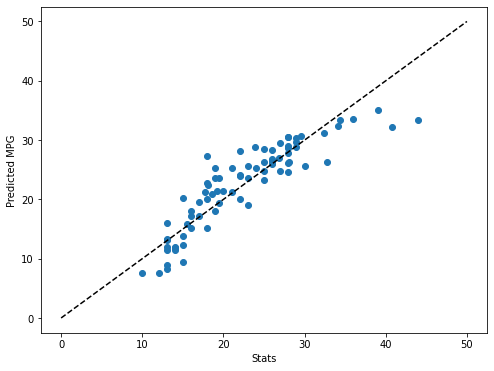

In [89]:
figure(figsize=(8,6))
scatter(x=y_test, y=test_preds)
plot ([0,50], [0,50], '--k')
axis('tight')
xlabel('Stats')
ylabel('Predicted MPG')
show()

## Bonus Point (2 pts directly to your final course grade)

Analyze the mpg data through ElasticNet regression (1pt) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Compare your evaluation result of elastic net and your result in Question B as well as your linear regression result from HW3. What is your observation? (1pt)

**I will not answer questions related to bonus point in email/office hours.**